In [23]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [24]:
#Loading the dataset
data = pd.read_csv("/content/marketing_campaign.csv", sep="\t")
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [26]:
data=data.dropna()

In [27]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], format='%d-%m-%Y') # Specify the correct date format
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in the records:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in the records: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


# EDA

In [28]:
data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

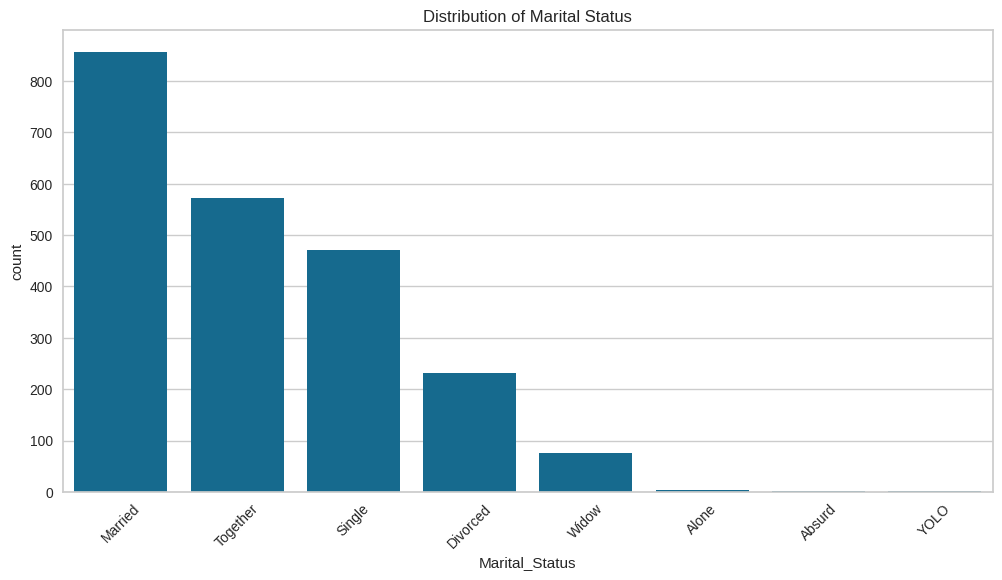

In [29]:
# Count plots for categorical features

plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Marital_Status', order=data['Marital_Status'].value_counts().index)
plt.title('Distribution of Marital Status')
plt.xticks(rotation=45)
plt.show()

In [30]:
data['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

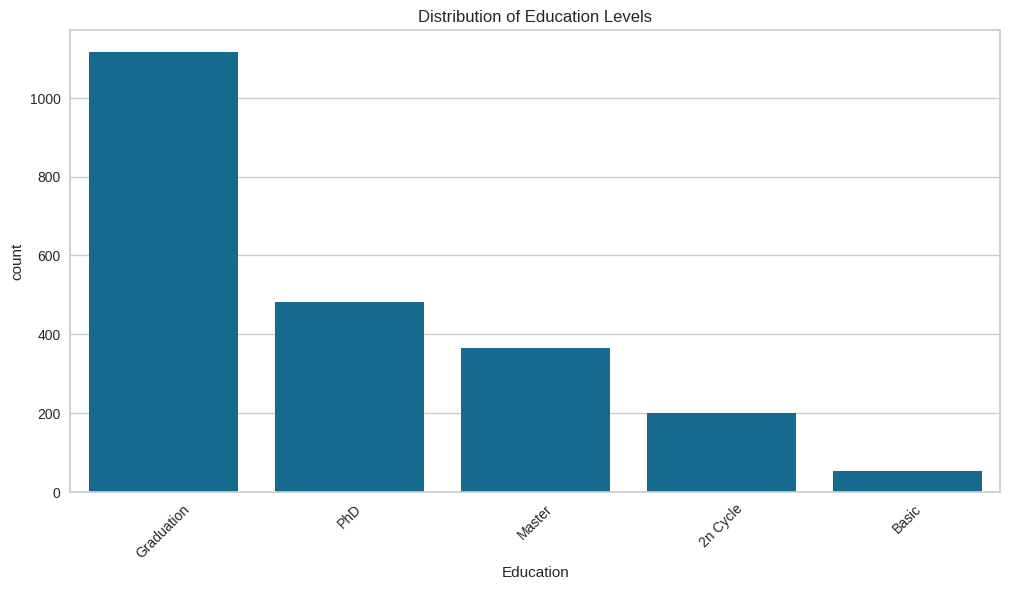

In [31]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Education', order=data['Education'].value_counts().index)
plt.title('Distribution of Education Levels')
plt.xticks(rotation=45)
plt.show()


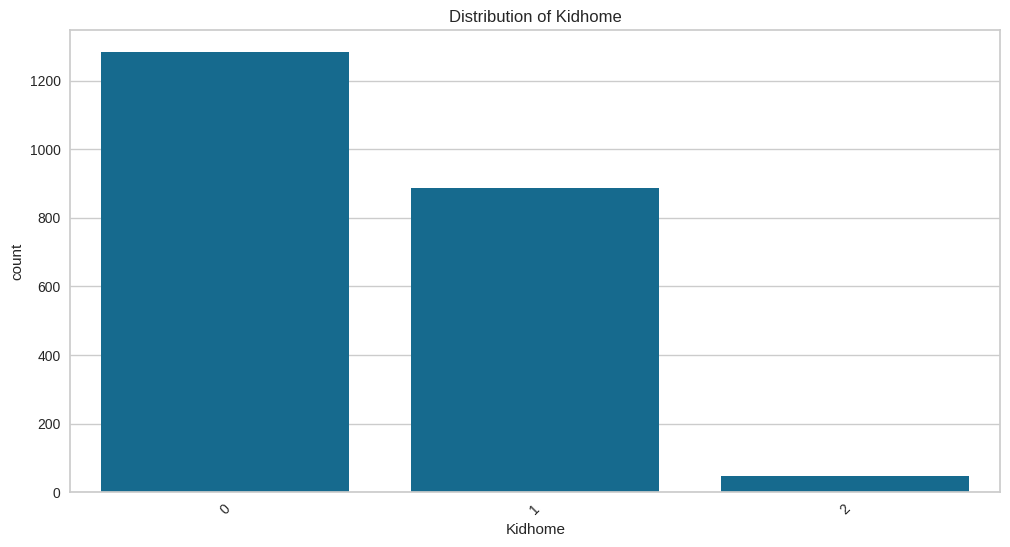

In [32]:
# Count plots for categorical features

plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Kidhome', order=data['Kidhome'].value_counts().index)
plt.title('Distribution of Kidhome')
plt.xticks(rotation=45)
plt.show()

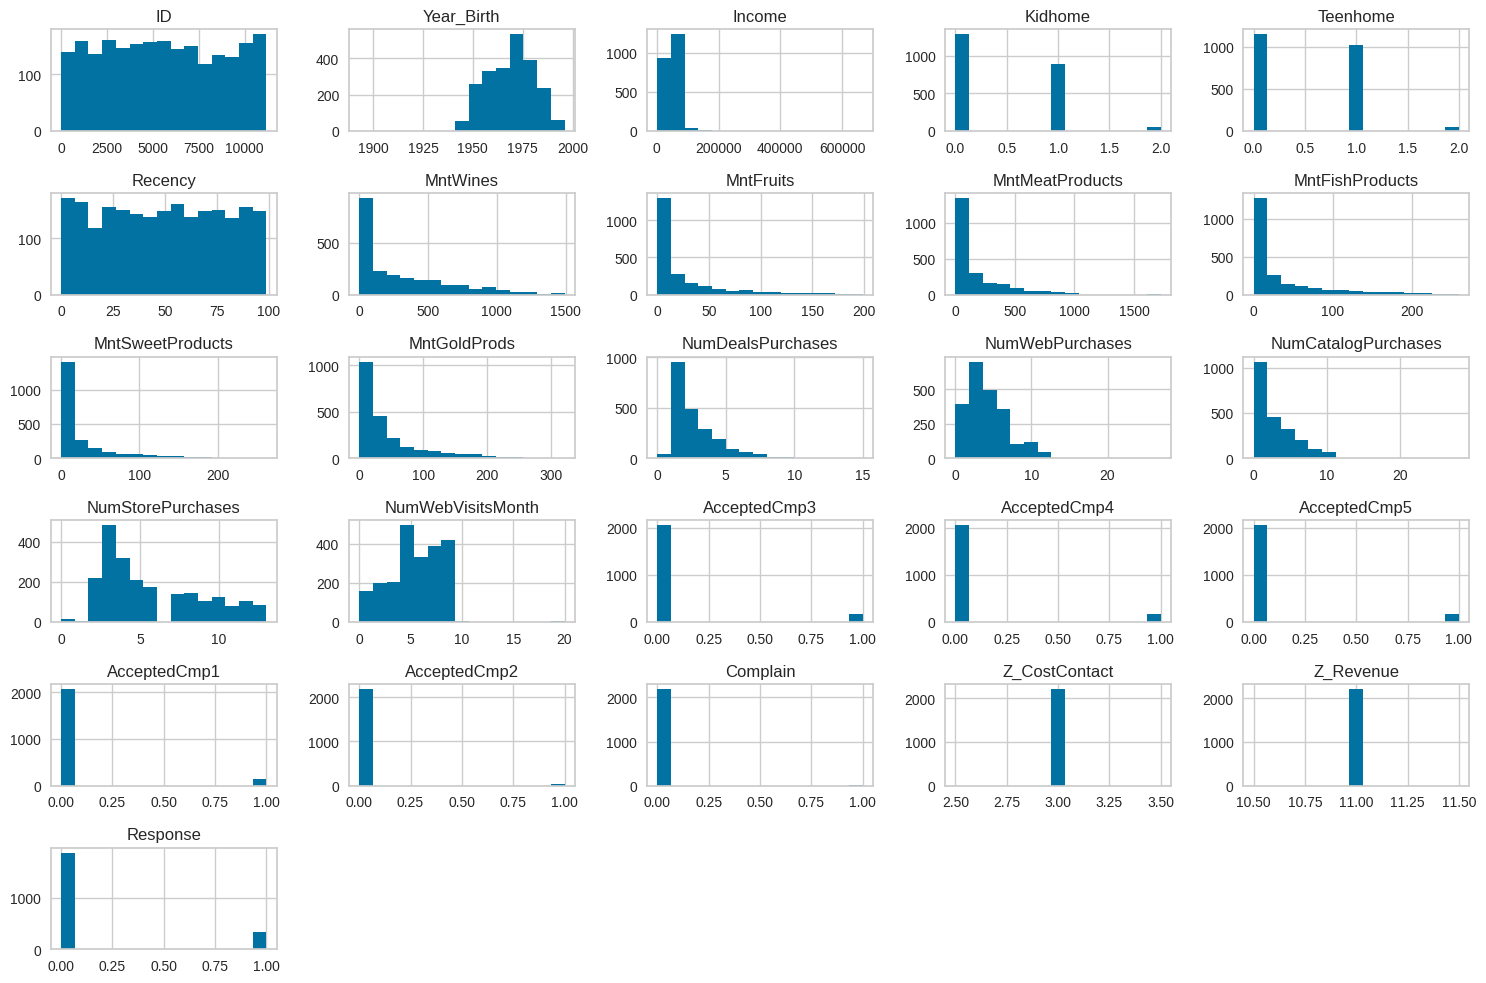

In [33]:
# Histogram for numerical features
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_cols].hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

<Axes: >

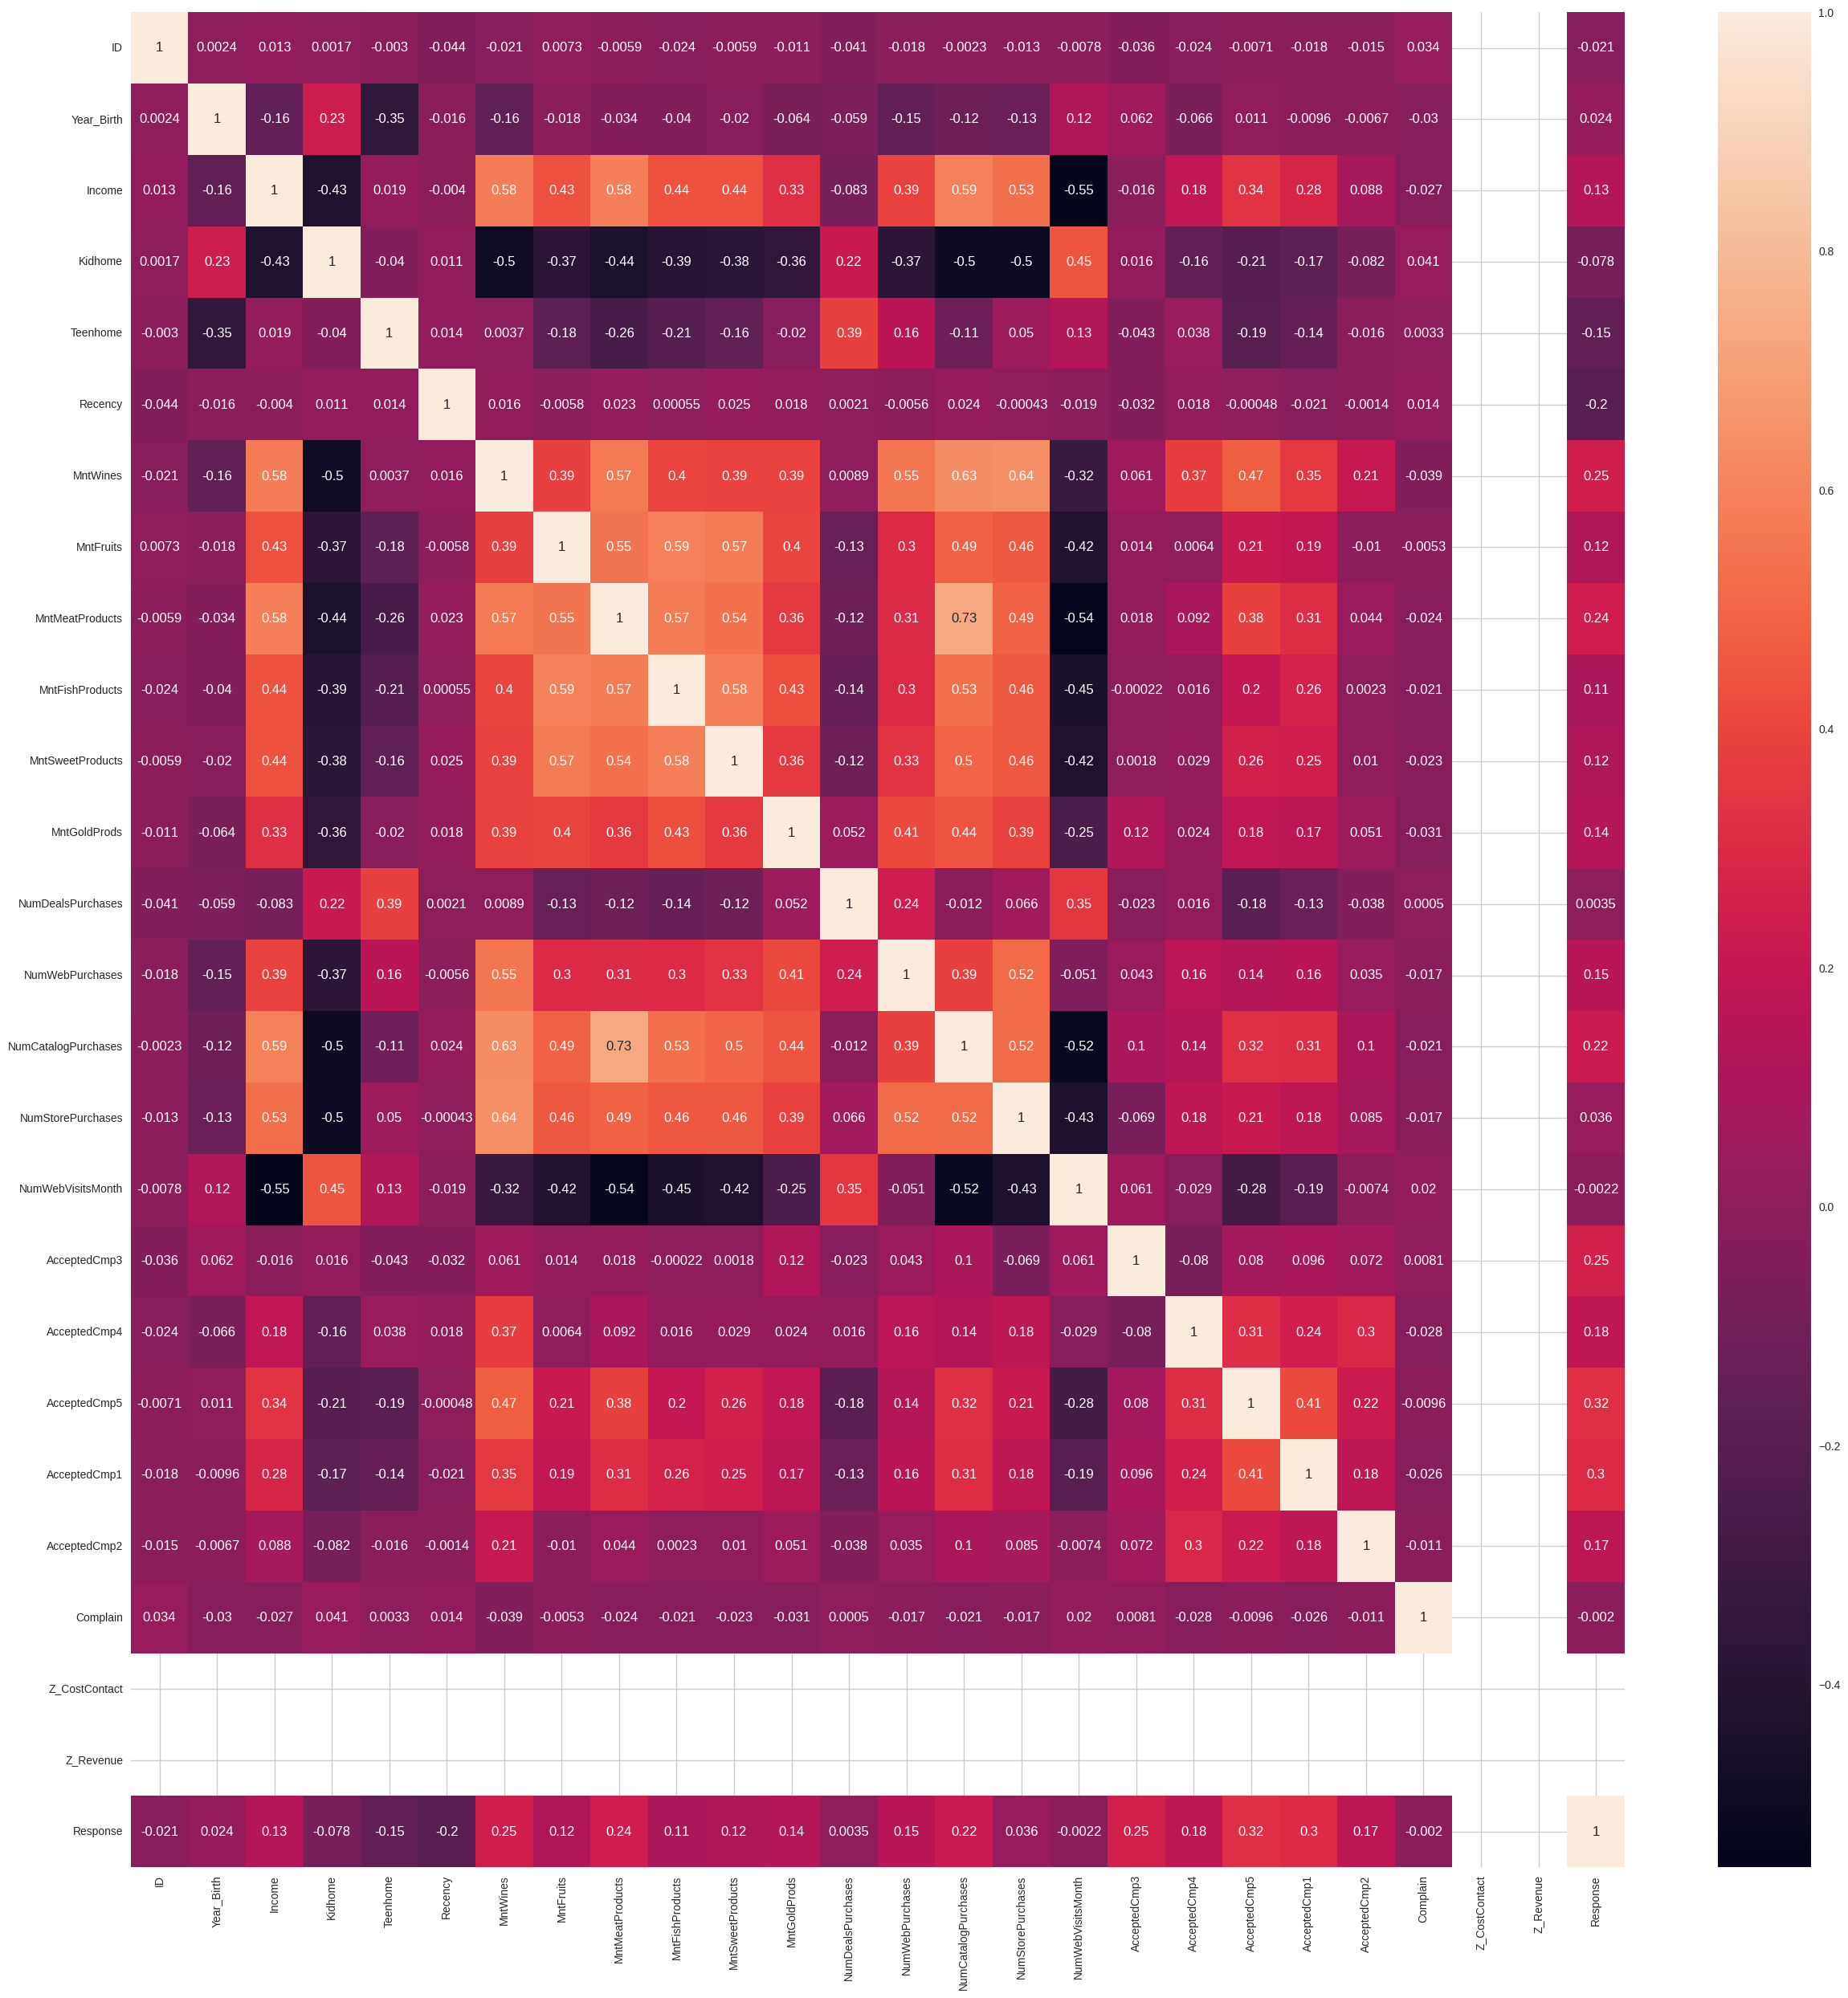

In [34]:
# Select only numerical columns before calculating correlation
numerical_data = data.select_dtypes(include=['number'])

# Calculate correlation matrix on numerical data
corrmat = numerical_data.corr()

plt.figure(figsize=(30,30))
sns.heatmap(corrmat,annot=True)

In [35]:
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]


In [36]:

s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Marital_Status']


In [37]:
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)

print("All features are now numerical")

All features are now numerical


In [38]:
#Creating a copy of data
ds = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response', 'Dt_Customer'] # Also drop the datetime column
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [39]:
scaled_ds.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Spent
0,-0.019809,-0.986443,-0.350527,0.254218,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,...,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,0.0,0.0,1.675488
1,-1.051009,-1.236801,-0.350527,0.254218,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,...,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,0.0,0.0,-0.962358
2,-0.445526,-0.318822,-0.350527,1.182303,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,...,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,0.0,0.0,0.280250
3,0.182737,1.266777,-0.350527,1.182303,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,...,-0.585174,-0.752171,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,0.0,0.0,-0.919224
4,-0.081373,1.016420,1.429011,-0.673866,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,...,-0.000703,-0.559135,1.391603,0.333796,0.112428,0.061232,-0.131574,0.0,0.0,-0.307044


In [40]:
pca = PCA(n_components=5)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3","col4","col5"]))
PCA_ds

,col1,col2,col3,col4,col5
0,4.179679,-0.267700,1.302899,0.377924,-0.228980
1,-2.498934,0.244216,-0.994339,0.954220,-0.575374
2,1.860878,-0.289628,-0.116649,0.622461,0.444895
3,-2.633985,-1.427079,0.319284,-0.158140,0.669404
4,-0.350276,0.027410,0.642733,-1.603917,-1.217692
...,...,...,...,...,...
2211,2.931095,0.999627,1.620741,1.035853,1.410807
2212,-1.473811,3.473079,0.100947,-0.406541,-0.598910
2213,1.595489,-0.725290,0.170543,-1.498056,-0.653675
2214,2.062897,1.144006,-1.225848,0.922765,1.594567


Elbow Method to determine the number of clusters to be formed:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

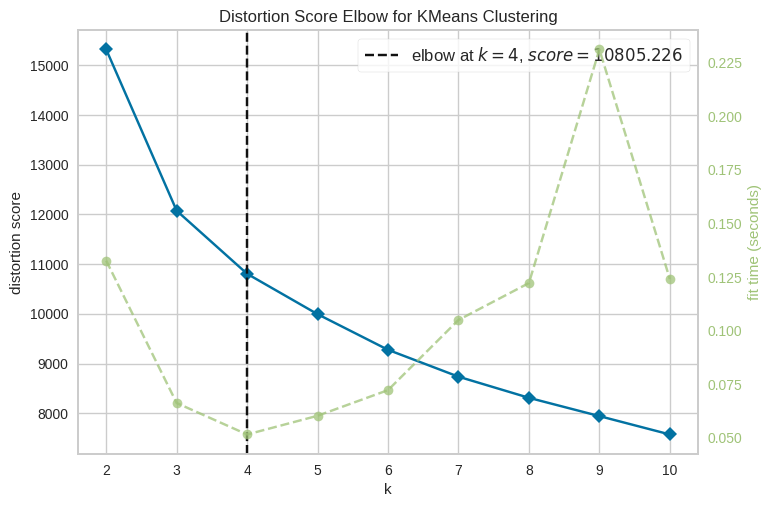

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [42]:
k=KMeans(n_clusters=4,random_state=36,init='k-means++')
k.fit(PCA_ds)
y=k.predict(PCA_ds)
data["Clusters_Kmeans"]=y
data.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Spent,Clusters_Kmeans
0,5524,1957,2,4,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,1617,0
1,2174,1954,2,4,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,27,2
2,4141,1965,2,5,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,776,0
3,6182,1984,2,5,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,53,1
4,5324,1981,4,3,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,422,3


In [43]:
#Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters_aglo"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters_aglo"]= yhat_AC

In [44]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Spent,Clusters_Kmeans,Clusters_aglo
0,5524,1957,2,4,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,1617,0,2
1,2174,1954,2,4,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,27,2,1
2,4141,1965,2,5,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,776,0,0
3,6182,1984,2,5,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,53,1,3
4,5324,1981,4,3,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,422,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,3,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,3,11,0,1341,3,0
2236,4001,1946,4,5,64014.0,2,1,2014-06-10,56,406,...,0,1,0,0,3,11,0,444,3,0
2237,7270,1981,2,2,56981.0,0,0,2014-01-25,91,908,...,0,0,0,0,3,11,0,1241,0,0
2238,8235,1956,3,5,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,3,11,0,843,3,0


<ipython-input-45-f5a7f467c213>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=data["Clusters_aglo"], palette= pal)


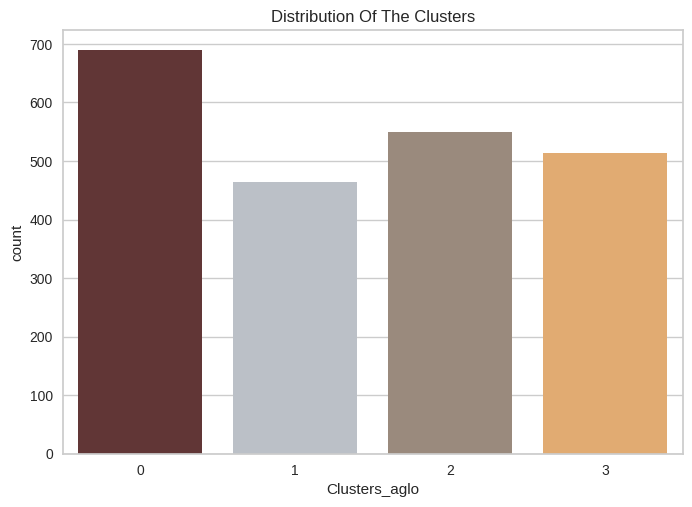

In [45]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data["Clusters_aglo"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

<ipython-input-46-acb698c492a2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=data["Clusters_Kmeans"], palette= pal)


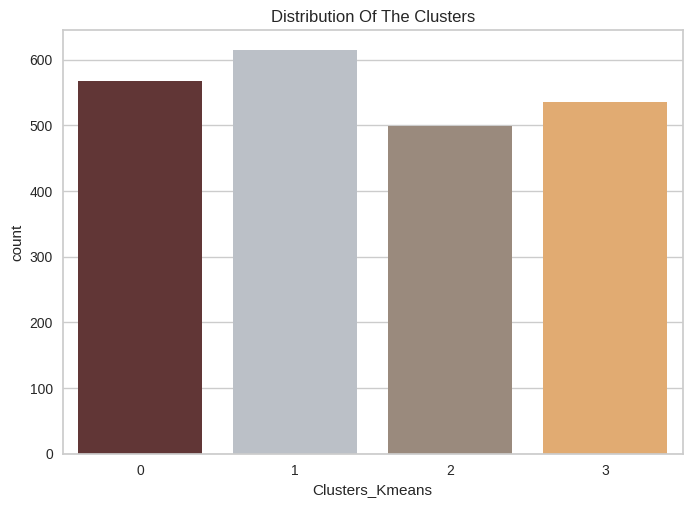

In [46]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data["Clusters_Kmeans"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

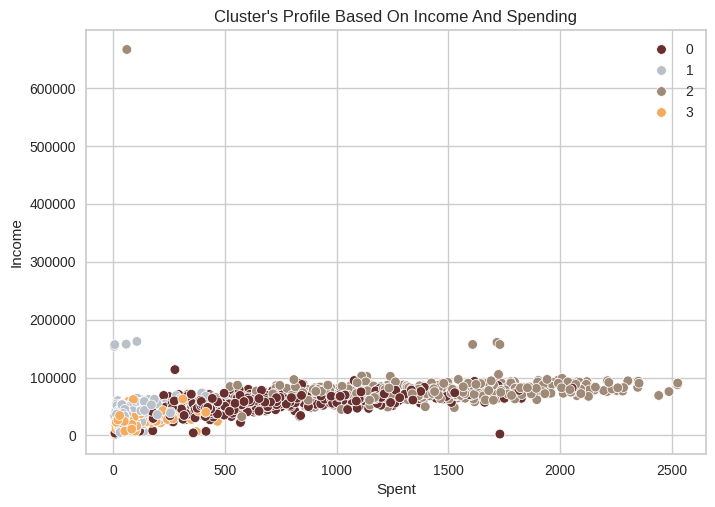

In [47]:

pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters_aglo"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

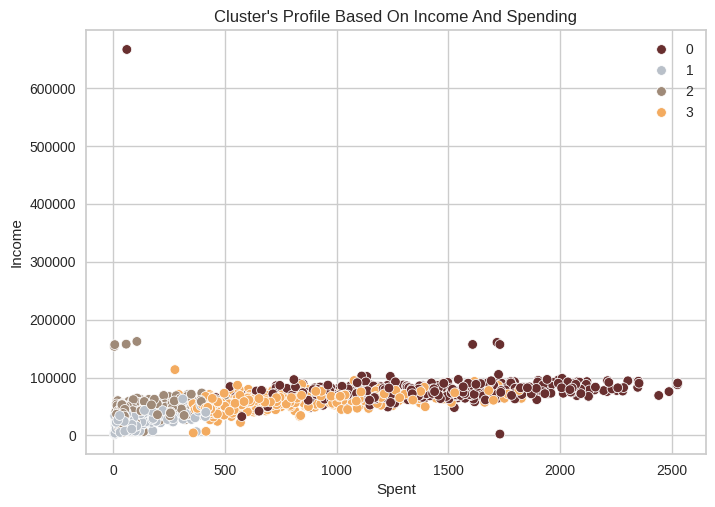

In [48]:

pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters_Kmeans"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

**Income vs  spending plot shows the clusters pattern**
* group 0: high spending & average income
* group 1: high spending & high income
* group 2: low spending & low income
* group 3: high spending & low income  
